## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [2]:
# read data into a DataFrame
import numpy as np
import pandas as pd
import pylab as plt
from IPython.display import Latex
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pplt
import statsmodels.formula.api as smf
from matplotlib import cm

pd.set_option('display.max_columns', 500)
%matplotlib inline

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
#data = pd.read_csv('sales.csv', index_col=0)
df = data
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

/Users/Mailman82/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


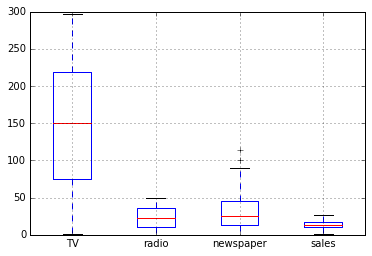

In [4]:
df.boxplot()
plt.show()


### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

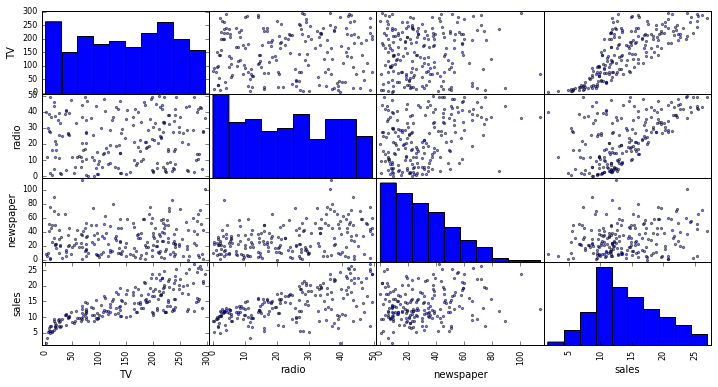

In [5]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df,figsize=(12,6))
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

There does not seem to be strong correlation between the predictive variables in the scatter plots.  There does seem to be correlation with sales and the TV and Radio predictive variables.  The correlation table (below) shows that the TV and sales correlation (0.782224) and the Radio and sales correlation (0.576223) are the strongest of the data while the Newspaper and sales (.228299) have little correlation.

In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [7]:
from sklearn.linear_model import LinearRegression
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


a) Set y to be the sales in df

In [8]:
y = df['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

b) Set X to be just the features described above in df

In [9]:
x = df.drop(['sales'],1)
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


c) Randomly split data into training and testing - 80% training, 20% testing.

In [10]:
from sklearn import preprocessing

#total amount of data 
totdata = float(len(x))
#scale the data (normalize)
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
#Split x data
x_tr = x[0:int(totdata*0.8)]
x_ts = x[int(totdata*0.8):]
#split y data
y_tr = y[0:int(totdata*0.8)]
y_ts = y[int(totdata*0.8):]

d) Train model on training data, and make predictions on testing data

In [11]:
#Linear Regression on the training data
rgrs = LinearRegression()
rgrs.fit(x_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [12]:
# Calculating the mean square error of the model
MSE = np.mean((rgrs.predict(x_ts) - y_ts) ** 2)
print("Residual sum of squares:", MSE )
# Calculating the R^2 score of the model
RSS = rgrs.score(x_ts, y_ts)
print('The R^2 score for the Model:', RSS)

('Residual sum of squares:', 2.7911451862763976)
('The R^2 score for the Model:', 0.89547828792243855)


The $R^2$ is $0.8955$ which means that the variance of the testing data is $89.55 \%$ explained through the model that is performed.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

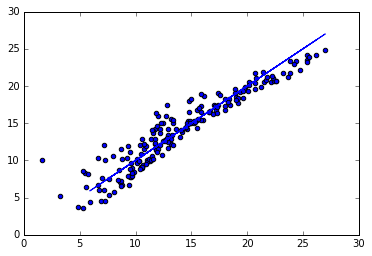

In [13]:
#Develop Scatter Plots
plt.scatter(y,rgrs.predict(x))
plt.plot(y_ts,y_ts)

The scatter plot appears to show a good model, as the line passes through the cluster of points.  Apart from some outliers, the model has a linear relationship.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

('Coefficients:', array([ 4.04663787,  2.66458107, -0.02050924]))


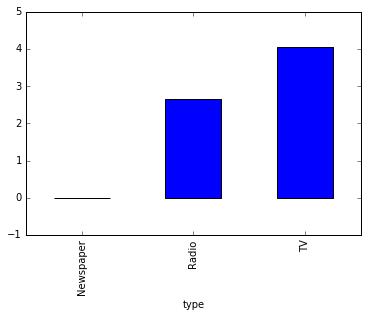

In [14]:
# calculate the coefficients
CE = rgrs.coef_
print('Coefficients:', CE)
#plot the dataframe
df = pd.DataFrame({'type':['TV','Radio','Newspaper'], 'Coefficients':CE})
df.groupby('type')['Coefficients'].mean().plot(kind='bar')

Prior to making conclusions it is always good to check that the standardization of the coefficients was performed and that the collinear features of the data are removed. 

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

From part (g) it is clear that TV has the most correlation to sales, where radio also has a good correlation, but not as strong as TV.  It is also clear that the Newspaper option is a poor choice in this result (may want to stop that investment and place that money elsewhere).  We could have done a decision tree that selected the important features based on the measurements.  But should have done a 3D look at the data that can examine the features for importance.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

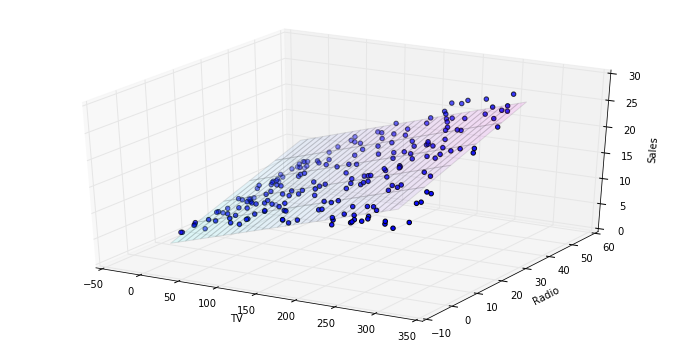

In [15]:
#Fit the data
hypsol = smf.ols(formula='sales ~ TV + radio', data = data)
fm = hypsol.fit()

fm.summary()
#Three Dimension plot
ThrD = pplt.figure(figsize=(12,6))
axis = ThrD.add_subplot(111, projection='3d')

#Set the mesh grid
xm = np.arange(0, 300, 10)                
ym = np.arange(0, 60, 10)
xm, ym = np.meshgrid(xm, ym)

#plot the surface area
RV = pd.core.frame.DataFrame({'TV': xm.ravel(), 'radio': ym.ravel()})
OP = fm.predict(exog = RV)
axis.plot_surface(xm, ym, OP.reshape(xm.shape), rstride=1, cstride=1, alpha = 0.1, cmap=cm.cool)

#plot the individual points
axis.scatter(data['TV'], data['radio'], data['sales'],c='blue')
axis.set_xlabel('TV')
axis.set_ylabel('Radio')
axis.set_zlabel('Sales')

plt.show()

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


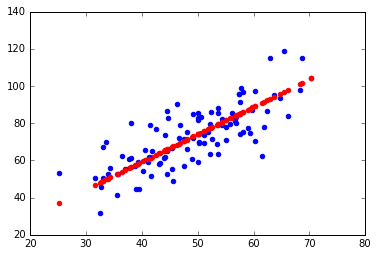

In [16]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, lr):
    points = genfromtxt('data.csv', delimiter=",")
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1],color='blue')
        plt.scatter(points[i,0],m*points[i,0]+b,color='red')

run(100, 0.0001)

('The Learning Rate is:', 7.5e-05)
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


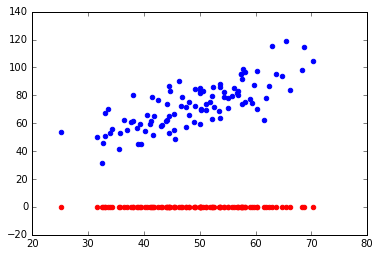

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0109102575831, m = 0.552802723019, error = 2250.78166847


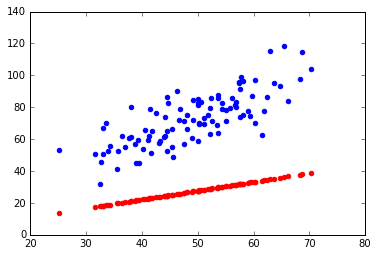

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0177592329563, m = 0.898973804582, error = 951.099069036


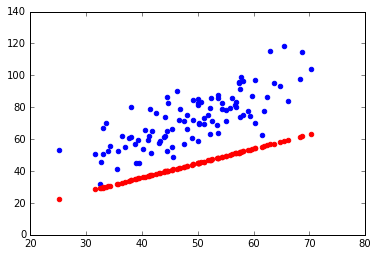

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0220649866809, m = 1.11574977963, error = 441.440451315


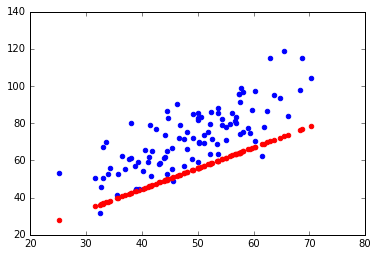

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0247781457115, m = 1.25149705321, error = 241.582486192


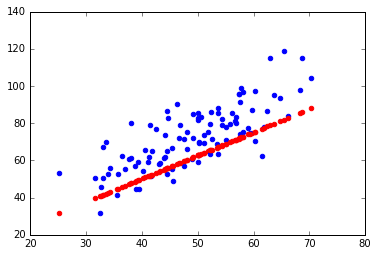

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0264940035623, m = 1.33650322352, error = 163.210003246


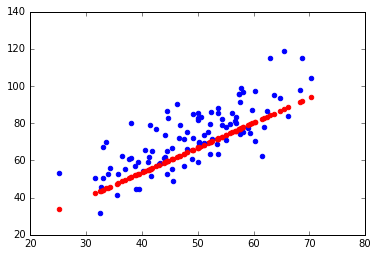

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0275853398676, m = 1.38973473234, error = 132.47693699


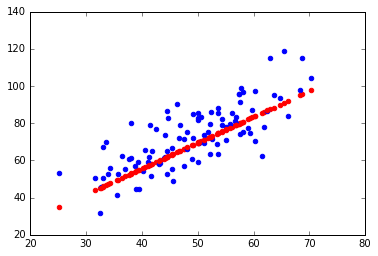

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.0282855935146, m = 1.42306858328, error = 120.425230696


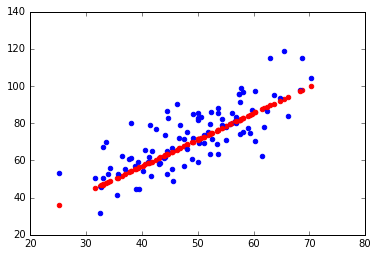

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0287409466151, m = 1.44394229238, error = 115.699248229


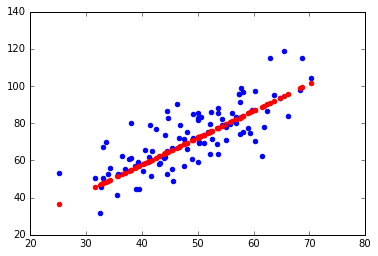

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.029042940086, m = 1.4570133176, error = 113.845981117


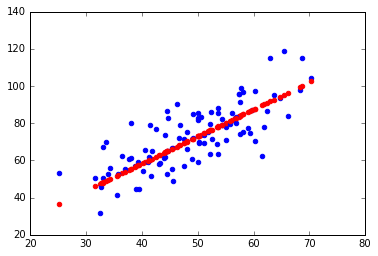

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 10 iterations b = 0.0292488979004, m = 1.46519821258, error = 113.119222962


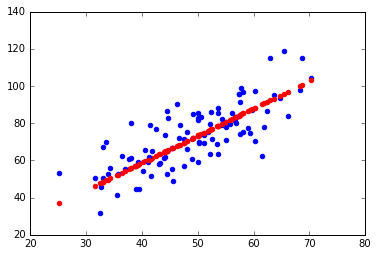

('The Learning Rate is:', 0.0001)
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


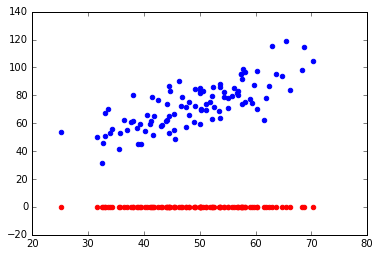

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0145470101107, m = 0.737070297359, error = 1484.58655741


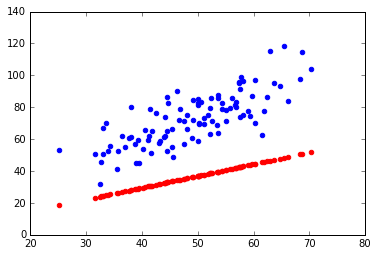

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0218739629596, m = 1.10679545435, error = 457.854257574


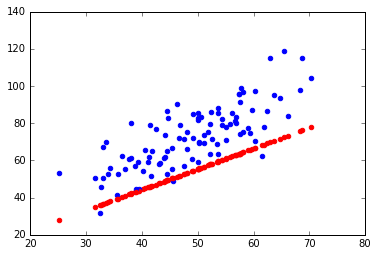

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0255792243213, m = 1.29225466491, error = 199.509985726


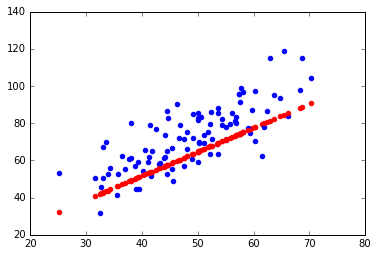

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0274677895591, m = 1.38528325565, error = 134.505910582


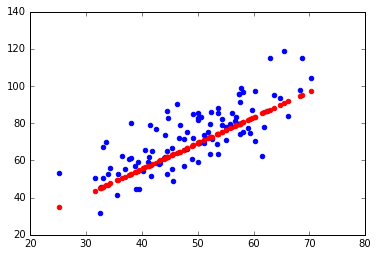

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0284450719817, m = 1.43194723238, error = 118.149693422


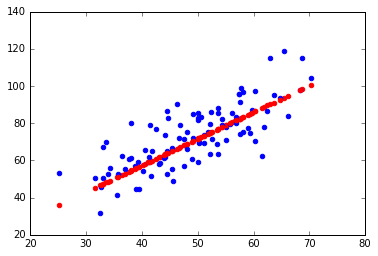

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0289652407665, m = 1.4553540089, error = 114.03414906


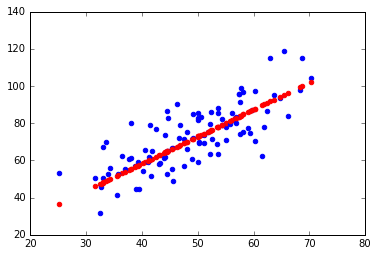

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.029256114126, m = 1.46709461772, error = 112.998577317


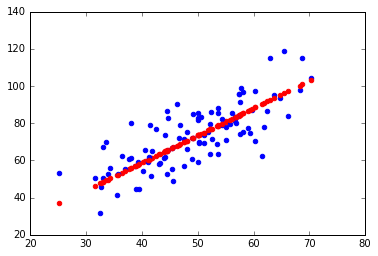

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0294319691638, m = 1.47298329822, error = 112.737981876


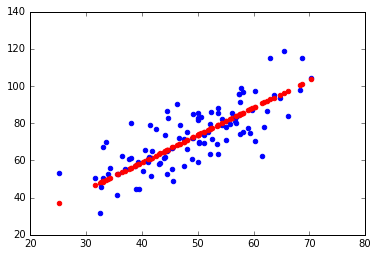

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0295501290244, m = 1.4759365619, error = 112.672384359


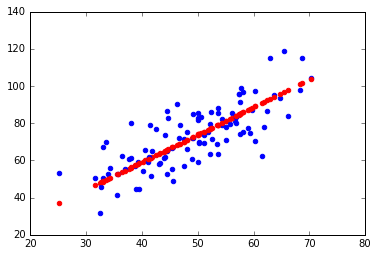

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 10 iterations b = 0.0296393478747, m = 1.47741737555, error = 112.655851815


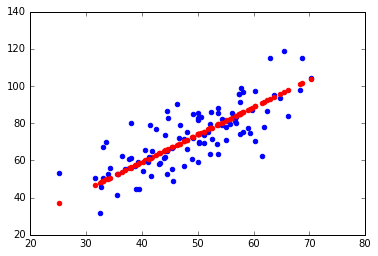

('The Learning Rate is:', 0.0003)
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


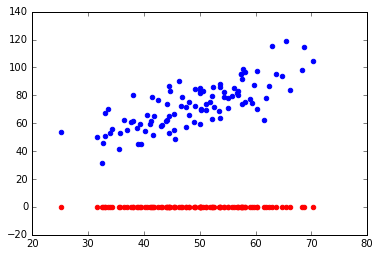

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0436410303322, m = 2.21121089208, error = 1449.47066594


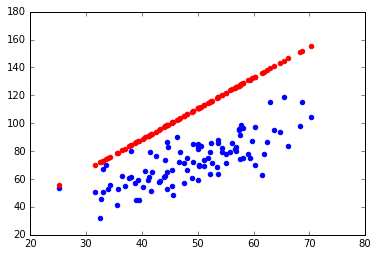

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0223015453075, m = 1.11631552085, error = 440.408733076


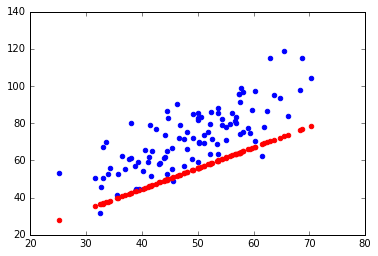

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0331374208433, m = 1.6584521226, error = 193.009315493


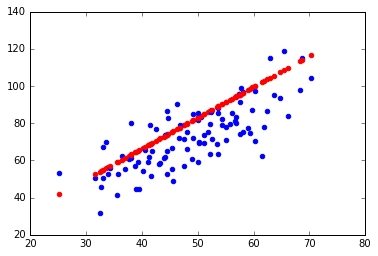

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0280415295334, m = 1.39000567997, error = 132.352449816


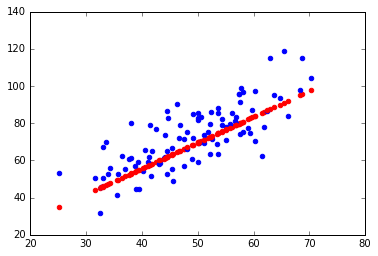

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0308343113198, m = 1.52292273114, error = 117.480666108


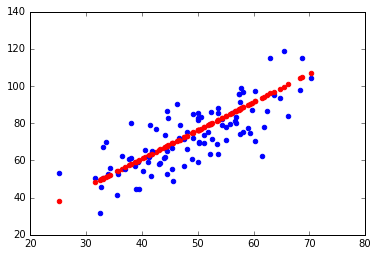

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0297209784109, m = 1.45710301483, error = 113.834356777


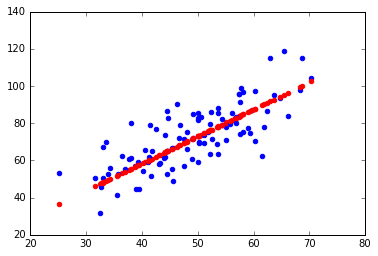

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.0305417679892, m = 1.48968861796, error = 112.940281791


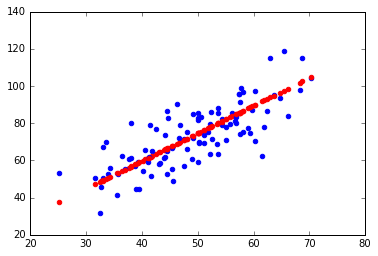

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0304048628429, m = 1.47354842676, error = 112.720992891


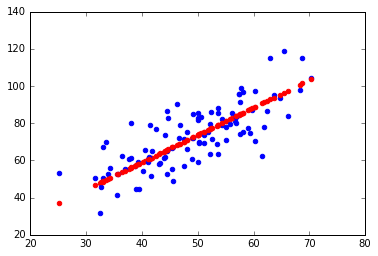

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0307421580348, m = 1.48153501107, error = 112.667146397


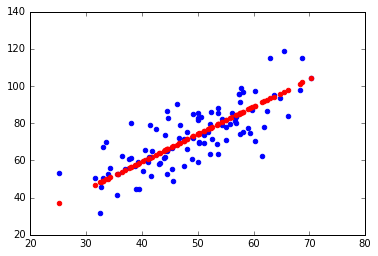

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 10 iterations b = 0.0308446448967, m = 1.4775751244, error = 112.65386267


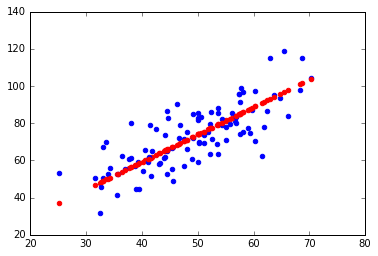

('The Learning Rate is:', 0.0005)
Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


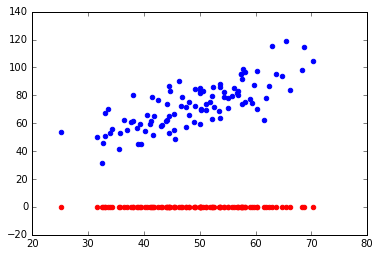

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0727350505537, m = 3.6853514868, error = 12248.9236581


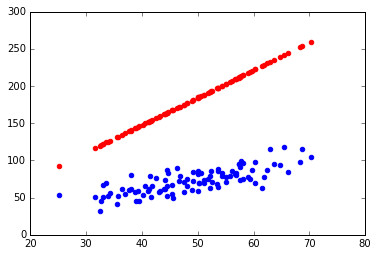

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = -0.0350313304396, m = -1.81292553558, error = 27125.9989615


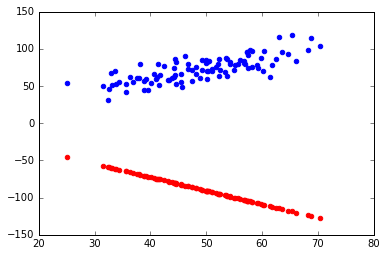

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.12649657886, m = 6.39006817487, error = 60239.9227455


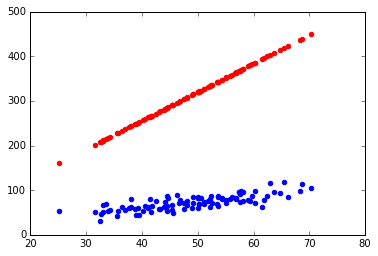

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = -0.113742006833, m = -5.84818522021, error = 133946.072777


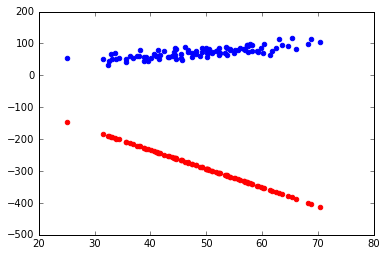

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.245424234669, m = 12.4103372967, error = 298003.844331


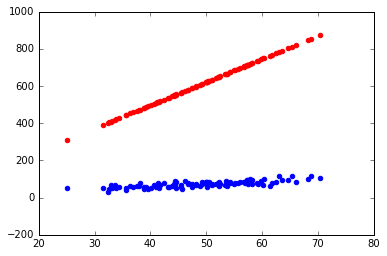

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = -0.289675670037, m = -14.8299953294, error = 663169.469941


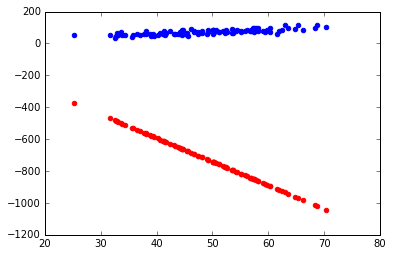

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.509401031399, m = 25.8104809976, error = 1475968.11288


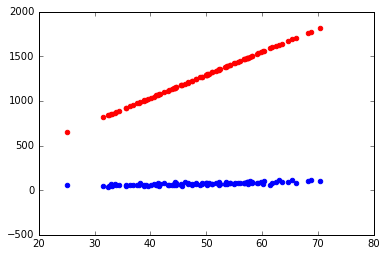

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = -0.682011661046, m = -34.8220133818, error = 3285124.25334


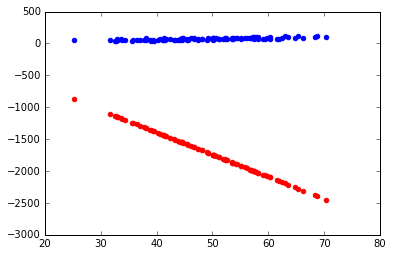

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 1.09623342269, m = 55.6370121244, error = 7312008.36394


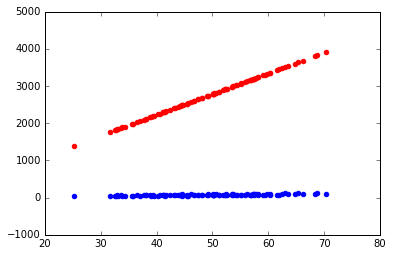

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 10 iterations b = -1.55602359767, m = -79.3209440373, error = 16275190.3011


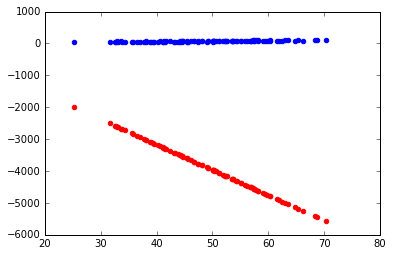

In [17]:
#Change the learning rates to see the affect on the error
lr = [0.000075, 0.0001, 0.0003, 0.0005]
for rate in lr:
    print('The Learning Rate is:', rate)
    for num in range(0,11):
        run(num, rate)
        plt.show()


I performed the gradient descent at four different learning rates:

$\begin{matrix}
LR1: &0.000075\\
LR2: &0.000100\\
LR3: &0.000300\\
LR4: &0.000500\end{matrix}$

The convergence of the system occured at 3 of the four learning rates.

LR1: 0.000075:

This first system does converge, but after 10 iterations is not performing as well as some of the other learning rates.  This is to say that the convergence is good, but the runtime isn't great. 

LR2: 0.0001:

The second of the learning rates performs the best of the four chosen.  This learning rate converges and the error gets better on each of the iterations.  The convergence is fast and closes.  This learning rate is most likely near the optimum.

LR3: 0.0003:

The third learning rate converges at a fairly good rate. 

LR4: 0.0005:

The last system does not converge and appears to greatly diverge from the expected outcome.


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

('The Learning Rate is:', 5.0000000000000002e-05)
('The error values by iteration are: ', [423.02017991777734, 130.31761996260104, 112.64976368476056, 112.64886099788522, 112.64795865355526, 112.64705664969495])


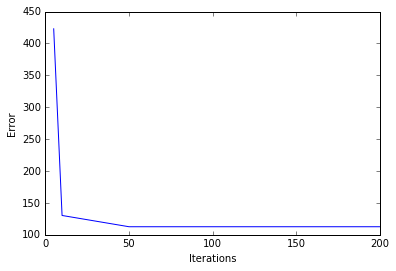

('The Learning Rate is:', 8.2142857142857153e-05)
('The error values by iteration are: ', [140.80964393224951, 112.7957973043371, 112.6491833444547, 112.64770089983509, 112.64621937403888, 112.64473876649683])


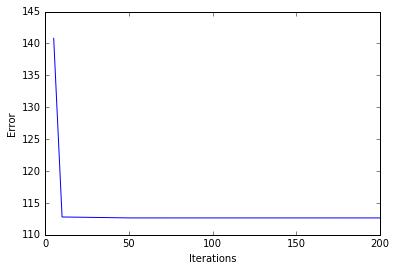

('The Learning Rate is:', 0.00011428571428571428)
('The error values by iteration are: ', [113.84030814740501, 112.65051350482101, 112.64860314546603, 112.64654136173229, 112.64448135573242, 112.6424231259335])


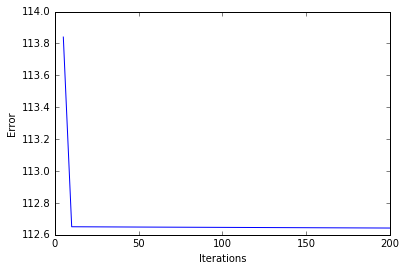

('The Learning Rate is:', 0.00014642857142857144)
('The error values by iteration are: ', [112.66172116160168, 112.65013777366767, 112.648023085814, 112.645382383308, 112.6427445977241, 112.64010972584038])


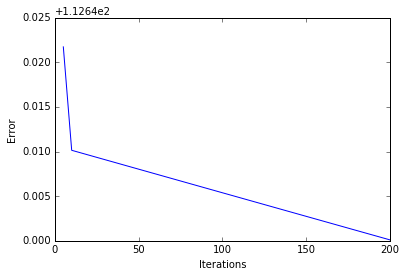

('The Learning Rate is:', 0.00017857142857142857)
('The error values by iteration are: ', [112.65034557636416, 112.65002165223994, 112.64744316546549, 112.64422396429336, 112.64100909910337, 112.63779856405539])


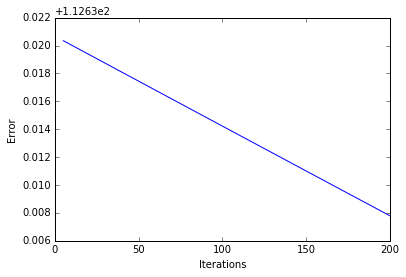

('The Learning Rate is:', 0.00021071428571428573)
('The error values by iteration are: ', [112.65028610435124, 112.64990555966115, 112.64686338438733, 112.64306610441983, 112.63927485895999, 112.63548963841815])


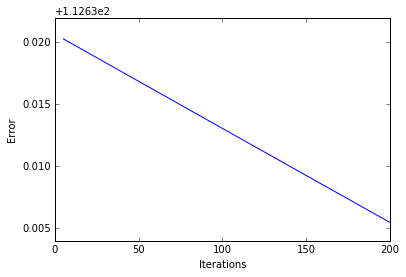

('The Learning Rate is:', 0.00024285714285714286)
('The error values by iteration are: ', [112.65115334921801, 112.64978947259054, 112.64628374254653, 112.64190880341872, 112.6375418763844, 112.63318294677052])


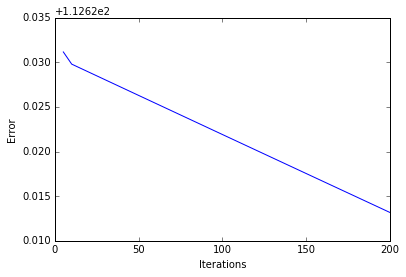

('The Learning Rate is:', 0.00027500000000000002)
('The error values by iteration are: ', [112.91633625711836, 112.64968638368575, 112.64570423990993, 112.64075206102174, 112.63581015046775, 112.63087848695653])


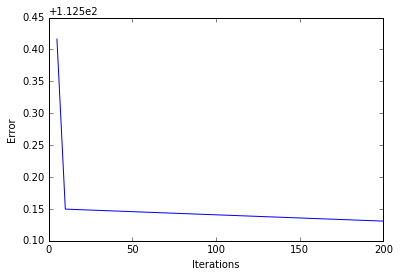

('The Learning Rate is:', 0.00030714285714285717)
('The error values by iteration are: ', [122.3221199646256, 112.66671430146205, 112.64512487644436, 112.63959587696057, 112.63407968030182, 112.62857625682203])


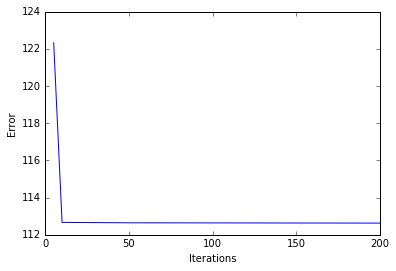

('The Learning Rate is:', 0.00033928571428571433)
('The error values by iteration are: ', [247.87171070324413, 116.00295616406237, 112.64454565211737, 112.63844025096724, 112.63235046497903, 112.62627625421517])


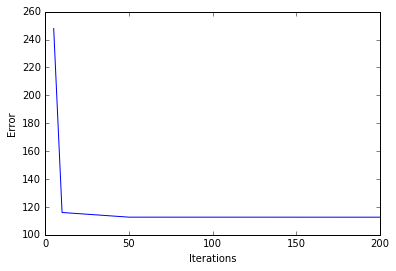

('The Learning Rate is:', 0.00037142857142857149)
('The error values by iteration are: ', [1200.6233693034299, 329.74155074136297, 112.6445121391843, 112.63728518282802, 112.63062250359256, 112.62397847698607])


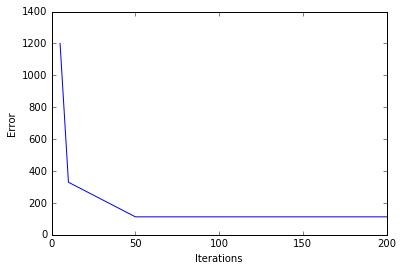

('The Learning Rate is:', 0.00040357142857142859)
('The error values by iteration are: ', [6215.8335634080995, 6944.2205945868591, 16948.45290484525, 52097.360334558049, 160628.31706566046, 495744.49322258716])


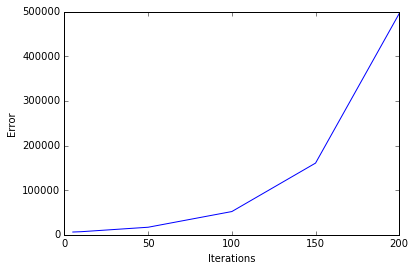

('The Learning Rate is:', 0.00043571428571428575)
('The error values by iteration are: ', [26667.179379493879, 129438.38522539217, 40931319606.06308, 3.0726934002789197e+17, 2.306655355597632e+24, 1.731594479626327e+31])


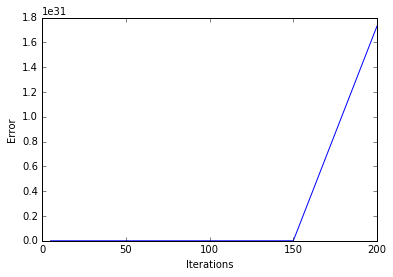

('The Learning Rate is:', 0.00046785714285714291)
('The error values by iteration are: ', [95776.704442945556, 1678550.6568283492, 15071534665756930.0, 4.1660328580593575e+28, 1.1515635374454101e+41, 3.1831207913024355e+53])


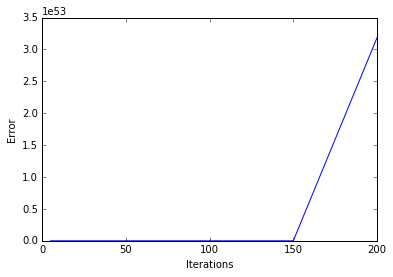

('The Learning Rate is:', 0.00050000000000000001)
('The error values by iteration are: ', [298003.84433146904, 16275190.301098265, 1.2919517552931682e+21, 3.0612607979207772e+38, 7.253612709988501e+55, 1.7187329280224378e+73])


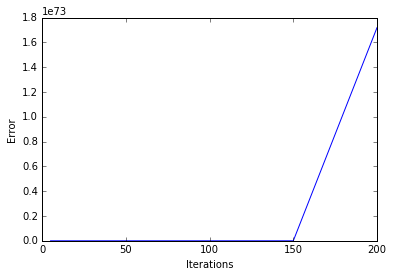

In [18]:
#Develop new run function to find the error
def run1(num_iterations, lr):
    points = genfromtxt('data.csv', delimiter=",")
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    #Calculate the initial error
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    #calculate and return the error at the max iterations
    return compute_error_for_line_given_points(b, m, points)

#set iteration counts
iterations = [5, 10, 50, 100, 150, 200]
#set learning rates at various values between two points
lr = np.linspace(0.00005, 0.0005, 15)
for rate in lr:
    error = []
    print('The Learning Rate is:', rate)
    for num in iterations:
        #Get the error
        error.append(run1(num, rate))
    print('The error values by iteration are: ', error)
    #plot the error as a fuction of the iterations
    pplt.xlabel('Iterations')
    pplt.ylabel('Error')
    pplt.plot(iterations,error,label='Learning Rate='+str(lr))    
    pplt.show()


The Error as a function of Iterations (in the graphs above) show that the convergence of this system is quite volatile.  The error gets fairly consistent with convergence along the Learning Rate, although convergence takes more iterations, until it appears it exceeds that point at 0.0004 when the error explodes and the system begins to diverge instead of converge at large iterations.